## Load the data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('Student_performance_10k.csv')

In [4]:
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


## Understand the Data

In [6]:
df.shape

(10000, 12)

In [7]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [9]:
df.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


## Identify Missing Value

In [11]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [12]:
df.isna().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

<Axes: >

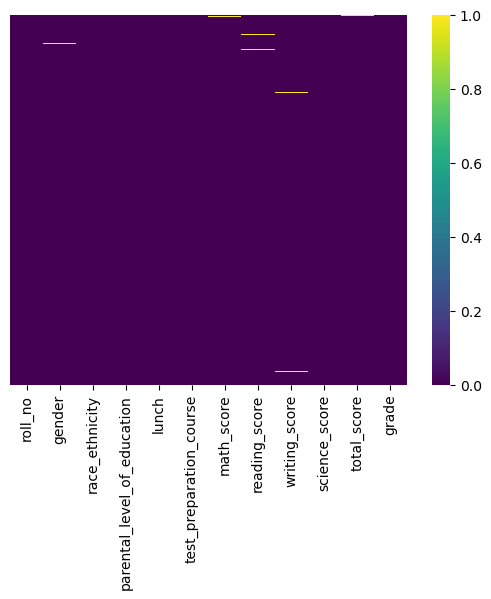

In [13]:
sns.heatmap(df.isnull(), cbar=True, cmap="viridis", yticklabels=False)

In [14]:
numeric=df.select_dtypes(include=['float64','int64']).columns

In [15]:
df[numeric].fillna(df[numeric].mean(),inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9940\4213256706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric].fillna(df[numeric].mean(),inplace=True)


In [16]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,associate's degree,1.0,1.0,70,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,some high school,1.0,0.0,87,60.0,100.0,89.0,336.0,A


In [18]:
df['gender'].unique()

array(['male', nan, 'Boy', '\\tmale', 'female', 'Girl'], dtype=object)

In [19]:
df.replace({'\\tmale':'male',
          'Boy':'male',
          'Girl':'female',
          'male':'male'},inplace=True)

In [20]:
df['gender'].unique()

array(['male', nan, 'female'], dtype=object)

In [21]:
x=df['gender'].mode()
x

0    female
Name: gender, dtype: object

In [22]:
df['gender'].fillna(x,inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9940\2321907463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(x,inplace=True)


In [23]:
df['gender'].value_counts()

gender
female    4993
male      4989
Name: count, dtype: int64

In [24]:
df.gender.unique()

array(['male', nan, 'female'], dtype=object)

In [25]:
df.dropna(inplace=True)

In [26]:
df.gender.unique()

array(['male', 'female'], dtype=object)

In [27]:
df['race_ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'C', 'D',
       'group C\\n', 'B', 'E', 'A'], dtype=object)

In [28]:
dict1={'A':'group A',
      'B':'group B',
      'C':'group C',
      'D':'group D',
      'E':'group E',
      'group C\\n':'group C'}
df['race_ethnicity'].replace(dict1,inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9940\2037134797.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race_ethnicity'].replace(dict1,inplace=True)


In [29]:
df.race_ethnicity.unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [30]:
df.math_score.unique()

array(['89', '65', '10', '22', '26', '40', '25', '39', '47', '37', '49',
       '72', '18', '11', '41', '32', '85', '78', '68', '38', '69', '87',
       '42', '51', '75', '60', '20', '81', '98', '83', '100', '24', '71',
       '23', '82', '35', '55', '19', '48', '29', '34', '74', '44', '28',
       '43', '62', '21', '93', '66', '0', '46', '13', '45', '57', '54',
       '70', '30', '97', '50', '61', '73', '88', '64', '36', '33', '76',
       '17', '56', '80', '53', '16', '58', '9', '8', '79', '12', '77',
       '99', '67', '59', '63', '86', '31', '92', '52', '94', '6', '27',
       '91', '96', '14', '84', '95', '15', '90', '7', '4', '\\t41', '5'],
      dtype=object)

In [31]:
df['math_score']=pd.to_numeric(df['math_score'],errors='coerce')

In [32]:
df.math_score.unique()

array([ 89.,  65.,  10.,  22.,  26.,  40.,  25.,  39.,  47.,  37.,  49.,
        72.,  18.,  11.,  41.,  32.,  85.,  78.,  68.,  38.,  69.,  87.,
        42.,  51.,  75.,  60.,  20.,  81.,  98.,  83., 100.,  24.,  71.,
        23.,  82.,  35.,  55.,  19.,  48.,  29.,  34.,  74.,  44.,  28.,
        43.,  62.,  21.,  93.,  66.,   0.,  46.,  13.,  45.,  57.,  54.,
        70.,  30.,  97.,  50.,  61.,  73.,  88.,  64.,  36.,  33.,  76.,
        17.,  56.,  80.,  53.,  16.,  58.,   9.,   8.,  79.,  12.,  77.,
        99.,  67.,  59.,  63.,  86.,  31.,  92.,  52.,  94.,   6.,  27.,
        91.,  96.,  14.,  84.,  95.,  15.,  90.,   7.,   4.,  nan,   5.])

In [33]:
df.math_score.fillna(df.math_score.mean(),inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9940\380331538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.math_score.fillna(df.math_score.mean(),inplace=True)


In [34]:
df.math_score.unique()

array([ 89.        ,  65.        ,  10.        ,  22.        ,
        26.        ,  40.        ,  25.        ,  39.        ,
        47.        ,  37.        ,  49.        ,  72.        ,
        18.        ,  11.        ,  41.        ,  32.        ,
        85.        ,  78.        ,  68.        ,  38.        ,
        69.        ,  87.        ,  42.        ,  51.        ,
        75.        ,  60.        ,  20.        ,  81.        ,
        98.        ,  83.        , 100.        ,  24.        ,
        71.        ,  23.        ,  82.        ,  35.        ,
        55.        ,  19.        ,  48.        ,  29.        ,
        34.        ,  74.        ,  44.        ,  28.        ,
        43.        ,  62.        ,  21.        ,  93.        ,
        66.        ,   0.        ,  46.        ,  13.        ,
        45.        ,  57.        ,  54.        ,  70.        ,
        30.        ,  97.        ,  50.        ,  61.        ,
        73.        ,  88.        ,  64.        ,  36.  

In [35]:
df = df.dropna(subset=['math_score'])

## Drop Columns

In [37]:
df.drop('roll_no',axis=1,inplace=True)

In [38]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9787 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       9787 non-null   category
 1   race_ethnicity               9787 non-null   object  
 2   parental_level_of_education  9787 non-null   object  
 3   lunch                        9787 non-null   float64 
 4   test_preparation_course      9787 non-null   float64 
 5   math_score                   9787 non-null   float64 
 6   reading_score                9787 non-null   float64 
 7   writing_score                9787 non-null   float64 
 8   science_score                9787 non-null   float64 
 9   total_score                  9787 non-null   float64 
 10  grade                        9787 non-null   category
dtypes: category(2), float64(7), object(2)
memory usage: 784.1+ KB


In [87]:
df['gender']=df['gender'].astype('category')

In [89]:
df['grade']=df['grade'].astype('category')

In [99]:
df['race_ethnicity']=df.race_ethnicity.astype('category')

In [109]:
df['parental_level_of_education']=df['parental_level_of_education'].astype('category')

In [111]:
df['gender'].value_counts()

gender
female    4928
male      4859
Name: count, dtype: int64

In [113]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    2861
group D    2529
group B    1869
group E    1489
group A    1039
Name: count, dtype: int64

In [115]:
df['grade'].value_counts()

grade
B       5544
C       2628
A        895
D        659
Fail      61
Name: count, dtype: int64

In [117]:
 df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          2227
high school           1952
associate's degree    1869
some high school      1707
bachelor's degree     1335
master's degree        697
Name: count, dtype: int64

## Encode Categorical Variable

In [128]:
df1=df.select_dtypes(include=['category'])

In [132]:
df2=pd.get_dummies(df1)
df2

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,grade_A,grade_B,grade_C,grade_D,grade_Fail
0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
1,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
9996,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
9997,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False
9998,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False


In [148]:
df3=df2.corr()
df3

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,grade_A,grade_B,grade_C,grade_D,grade_Fail
gender_female,1.000000,-1.000000,0.076847,-0.040599,0.010071,-0.024002,-0.004978,0.022310,-0.039420,0.006198,-0.038106,-0.022106,0.056268,0.064761,0.227820,-0.172115,-0.197200,-0.074562
gender_male,-1.000000,1.000000,-0.076847,0.040599,-0.010071,0.024002,0.004978,-0.022310,0.039420,-0.006198,0.038106,0.022106,-0.056268,-0.064761,-0.227820,0.172115,0.197200,0.074562
race_ethnicity_group A,0.076847,-0.076847,1.000000,-0.167437,-0.221499,-0.203432,-0.145987,0.006400,-0.012298,-0.005169,0.006456,0.000458,0.005055,-0.004619,0.011005,-0.008226,0.004023,-0.018864
race_ethnicity_group B,-0.040599,0.040599,-0.167437,1.000000,-0.312259,-0.286789,-0.205806,0.003361,0.011405,0.009909,0.010002,-0.014437,-0.015058,0.008192,0.000145,-0.013410,0.013643,0.001159
race_ethnicity_group C,0.010071,-0.010071,-0.221499,-0.312259,1.000000,-0.379388,-0.272257,0.001510,-0.004749,0.009208,-0.003277,-0.010723,0.007103,0.001066,0.013754,-0.006708,-0.015816,-0.002375
race_ethnicity_group D,-0.024002,0.024002,-0.203432,-0.286789,-0.379388,1.000000,-0.250050,0.009527,0.000701,-0.008414,-0.004635,0.017556,-0.017897,0.007878,-0.021003,0.014701,0.004389,0.006635
race_ethnicity_group E,-0.004978,0.004978,-0.145987,-0.205806,-0.272257,-0.250050,1.000000,-0.022691,0.003226,-0.007816,-0.006683,0.007588,0.024962,-0.015955,-0.001417,0.012308,-0.003702,0.009830
parental_level_of_education_associate's degree,0.022310,-0.022310,0.006400,0.003361,0.001510,0.009527,-0.022691,1.000000,-0.193089,-0.242503,-0.134534,-0.263691,-0.223310,-0.013452,0.014832,-0.009891,0.006382,-0.008750
parental_level_of_education_bachelor's degree,-0.039420,0.039420,-0.012298,0.011405,-0.004749,0.000701,0.003226,-0.193089,1.000000,-0.198372,-0.110051,-0.215705,-0.182672,0.015406,-0.007949,-0.007707,0.004881,0.021483
parental_level_of_education_high school,0.006198,-0.006198,-0.005169,0.009909,0.009208,-0.008414,-0.007816,-0.242503,-0.198372,1.000000,-0.138215,-0.270907,-0.229420,-0.000449,-0.004510,0.009722,-0.003506,-0.013537


In [168]:
def ratio(score):
    x=df['total_score'].max()
    return score/x

In [170]:
df['Performance Ratio']=df['total_score'].apply(ratio)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9787 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       9787 non-null   category
 1   race_ethnicity               9787 non-null   category
 2   parental_level_of_education  9787 non-null   category
 3   lunch                        9787 non-null   float64 
 4   test_preparation_course      9787 non-null   float64 
 5   math_score                   9787 non-null   float64 
 6   reading_score                9787 non-null   float64 
 7   writing_score                9787 non-null   float64 
 8   science_score                9787 non-null   float64 
 9   total_score                  9787 non-null   float64 
 10  grade                        9787 non-null   category
 11  Performance Ratio            9787 non-null   float64 
dtypes: category(4), float64(8)
memory usage: 727.1 KB


In [174]:
df['Performance Ratio']#.unique()

0       0.621410
1       0.856397
2       0.689295
3       0.516971
4       0.556136
          ...   
9995    0.631854
9996    0.785901
9997    0.864230
9998    0.877285
9999    0.765013
Name: Performance Ratio, Length: 9787, dtype: float64

In [176]:
df['Performance Score']=df['total_score'].apply(lambda x: x/df['total_score'].max())

In [178]:
df['Performance Score']

0       0.621410
1       0.856397
2       0.689295
3       0.516971
4       0.556136
          ...   
9995    0.631854
9996    0.785901
9997    0.864230
9998    0.877285
9999    0.765013
Name: Performance Score, Length: 9787, dtype: float64